In [48]:
# Loading in the imports required for the program
import pandas as pd
from random import *
import random
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

In [49]:
def get_data(name):
    '''
    Function to return the .dat file in a usable format
    name: name of the .dat file
    return
        n: the dimensions of the data
        D: the distance matricie
        F: the flow matricie
    '''
    df = pd.read_csv("data.txt")
    n = int(df.columns[0])
    D = []
    F = []
    counter = 0
    for i in df:
        for x in df[i]:
            if counter < n:
                D.append(x.split())
            else:
                F.append(x.split())
            counter = counter + 1
    for i in range(n):
        for j in range(n):
            D[i][j] = int(D[i][j])
            F[i][j] = int(F[i][j])
    D = D
    F = F
    return n, D, F

In [50]:
def pheromone_matrix(n):
    '''
    Function to reutrn a random pheromone matrix
    n: dimension of the data
    return
        pher: pheromone matrix
    '''
    pher = []
    for i in range(n):
        temp = random.random()
        pher.append([])
        for j in range(n):
            if i != j:
                pher[i].append(temp)
            else:
                pher[i].append(0)
    return pher


In [51]:
def evaluate_fitness(solution, n, D, F):
    '''
    Evaluate the fitness of a solution
    solution: the solution to be evaluated
    n: dimension of the data
    D: distance matrix
    F: flow matrix
    fitness_repitions: number of times the fitness function has been called
    return
        cost: cost of the solution
    '''
    cost = 0
    found = False
    for i in range(n-1):
        for j in range(n-1):
            cost = cost + (D[i][j]*F[solution[i+1]][solution[j+1]])


                
    return cost

In [52]:
def update_pheromone(solutions, fitnesses, p, elitist):
    '''
    Update the pheromone matrix
    solutions: all the solutions from the current iteration
    fitnesses: all the fitnesses associated with the solutions
    p: the pheromone matrix
    return
        p: the new pheromone matrix
    '''
    if elitist: # Changing the solutions list to only contain the top 10% of solutions
        zipped_list = zip(fitnesses, solutions)
        sorted_list = sorted(zipped_list)
        tuples = zip(*sorted_list)
        fitnesses, solutions = [ list(tuple) for tuple in tuples]
        rate = round(len(solutions)*0.1)
        solutions = solutions[:rate]
    
    for i in range(len(solutions)): # Updating the pheromone between paths 
        solution = solutions[i]
        update = 1/fitnesses[i]
        for x in range(1, len(solution)):
            p[solution[x-1]][solution[x]] = p[solution[x-1]][solution[x]] + update
    return p

In [53]:
def evaporate_pheromone(p, evaporate_rate):
    '''
    Evaporate the pheromone matrix
    p: the pheromone matrix
    evaporate_rate: the rate of evaporation
    return
        p: the new pheromone matrix
    '''
    for i in range(len(p)):
        for j in range(len(p)):
            test = p[i][j]
            p[i][j] = p[i][j] * evaporate_rate
    return p

In [54]:
def create_solution(n, p):
    '''
    Create one solution
    n: dimension of the data
    p: pheromone matrix
    return
        path: the path taken by the ant
    '''
    start_position = 50
    path = [start_position]
    store = 0
    q = deepcopy(p)
    q = np.array(q) # q is a copy of p as an np array
    for i in range(n-1): # Loop through pheromone matrix
        q[:,start_position] = 0 # Make the how column in position start_position equal 0
        
        probabilities = np.cumsum(q[start_position])
        probabilities = probabilities/sum(q[start_position]) # Create cumulative probabilities
        location = random.random()
        for x in range(len(probabilities)):
            if probabilities[x] > location:
                store = x # Storing the node that the random value is in between
                break
        start_position = store
        path.append(store)
    return path

In [55]:
def create_solutions(n, ants, p, iterations, evapourate_rate, D, F, elitist):
    '''
    Main function to create all the solutions, update pheromones and find the best solutions
    n: number of  dimensions
    ants: number of ants
    p: pheronmone matrix
    iterations: termination criteria
    evaporate_rate: the rate of evaporation
    D: distance matrix
    F: flow matrix
    return
        best_fitness: the best fitness value for the solution in the final iteration
        best_solution: the path with the best fitness in the final iteration
    '''
    fitness_repitions = 0
    find = False
    final_fitnesses = []
    while True:
        solution_list = []
        fitnesses = []
        # Create the number of solutions their are as ants and increase termination criteria
        for j in range(ants):
            solution_list.append(create_solution(n, p))
            temp = evaluate_fitness(solution_list[-1], n, D, F)
            fitness_repitions = fitness_repitions + 1
            fitnesses.append(temp)
            if fitness_repitions >= iterations:
                find = True
                break
        # Update and evapourate pheromone
        p = update_pheromone(solution_list, fitnesses, p, elitist)
        p = evaporate_pheromone(p, evapourate_rate)
        # Append fitnesses to return from function
        final_fitnesses.append(fitnesses)
        # Returning best solution
        if find:
            best_fitness = min(fitnesses) 
            best_solution = solution_list[fitnesses.index(best_fitness)]
            break
    # Flattening final_fitnesses
    final_fitnesses = [item for sublist in final_fitnesses for item in sublist]
    return best_fitness, best_solution, p, final_fitnesses

# Running Experiments

In [56]:
# Declairing parameters
n, D, F = get_data("data.txt") # Reading the data
n = n + 1 # Adding a start node
iterations = 10000 # Termination criteria

# Ants = 100, Evapouration Rate = 0.9, Non-Elitist 

In [57]:
mean1 = []
solutions1 = []
for i in range(5):
    random.seed()
    p = pheromone_matrix(n) # Create pheromone matrix
    ants = 100 # Declaire number of ants
    evaporate_rate = 0.9 # Pheromone evapouration rate
    fitness1, solution1, p1, final1 = create_solutions(n, ants, p, iterations, evaporate_rate, D, F, False) # ACO algorithm
    mean1.append(fitness1)
    solutions1.append(solution1)
first = sum(mean1)/5 # Storing the best fitness result


# Ants = 100, Evapouration Rate = 0.5, Non-Elitist 

In [58]:
mean2 = []
solutions2 = []
for i in range(5):
    random.seed()
    p = pheromone_matrix(n) # Create pheromone matrix
    ants = 100 # Declaire number of ants
    evaporate_rate = 0.5 # Pheromone evapouration rate
    fitness2, solution2, p2, final2 = create_solutions(n, ants, p, iterations, evaporate_rate, D, F, False) # ACO algorithm
    mean2.append(fitness2)
    solutions2.append(solution2)
second = sum(mean2)/5 # Storing the best fitness result


# Ants = 10, Evapouration Rate = 0.9, Non-Elitist 

In [59]:
mean3 = []
solutions3 = []
for i in range(5):
    random.seed()
    p = pheromone_matrix(n) # Create pheromone matrix
    ants = 10 # Declaire number of ants
    evaporate_rate = 0.9 # Pheromone evapouration rate
    fitness3, solution3, p3, final3 = create_solutions(n, ants, p, iterations, evaporate_rate, D, F, False) # ACO algorithm
    mean3.append(fitness3)
    solutions3.append(solution3)
third = sum(mean3)/5 # Storing the best fitness result


# Ants = 10, Evapouration Rate = 0.5, Non-Elitist 

In [60]:
mean4 = []
solutions4 = []
for i in range(5):
    random.seed()
    p = pheromone_matrix(n) # Create pheromone matrix
    ants = 10 # Declaire number of ants
    evaporate_rate = 0.5 # Pheromone evapouration rate
    fitness4, solution4, p4, final4 = create_solutions(n, ants, p, iterations, evaporate_rate, D, F, False) # ACO algorithm
    mean4.append(fitness4)
    solutions4.append(solution4)
forth = sum(mean4)/5 # Storing the best fitness result


# Ants = 50, Evapouration Rate = 0.9, Non-Elitist 

In [61]:
mean5 = []
solutions5 = []
for i in range(5):
    random.seed()
    p = pheromone_matrix(n) # Create pheromone matrix
    ants = 50 # Declaire number of ants
    evaporate_rate = 0.9 # Pheromone evapouration rate
    fitness5, solution5, p5, final5 = create_solutions(n, ants, p, iterations, evaporate_rate, D, F, False) # ACO algorithm
    mean5.append(fitness5)
    solutions5.append(solution5)
fith = sum(mean5)/5 # Storing the best fitness result


# Ants = 50, Evapouration Rate = 0.5, Non-Elitist 

In [62]:
mean6 = []
solutions6 = []
for i in range(5):
    random.seed()
    p = pheromone_matrix(n) # Create pheromone matrix
    ants = 50 # Declaire number of ants
    evaporate_rate = 0.5 # Pheromone evapouration rate
    fitness6, solution6, p6, final6 = create_solutions(n, ants, p, iterations, evaporate_rate, D, F, False) # ACO algorithm
    mean6.append(fitness6)
    solutions6.append(solution6)
sixth = sum(mean6)/5 # Storing the best fitness result


# Ants = 200, Evapuration Rate = 0.7, Elitist

In [63]:
mean7 = []
solutions7 = []
for i in range(5):
    random.seed()
    p = pheromone_matrix(n) # Create pheromone matrix
    ants = 200 # Declaire number of ants
    evaporate_rate = 0.7 # Pheromone evapouration rate
    fitness7, solution7, p7, final7 = create_solutions(n, ants, p, iterations, evaporate_rate, D, F, True) # ACO algorithm
    mean7.append(fitness7)
    solutions6.append(solution7)
seventh = sum(mean7)/5 # Storing the best fitness result


# Final Results

In [64]:
print("_"*85)
print("|                 | M = 100, E=0.9 | M = 100, E=0.5 | M = 10, E=0.9 | M = 10, E=0.5 |")
print("-" * 85)
print("|Mean Best Fitness|   " + str(first) + "    |   " + str(second) + "    |   " + str(third) + "   |   " + str(forth) + "   |")
print("-" * 85)
print("|  Best Fitness   |    " + str(min(mean1)) + "     |    " + str(min(mean2)) + "     |    " + str(min(mean3)) + "    |    " + str(min(mean4)) + "    |")
print("-" * 85)
print("|  Worse Fitness  |    " + str(max(mean1)) + "     |    " + str(max(mean2)) + "     |    " + str(max(mean3)) + "    |    " + str(max(mean4)) + "    |")
print("-" * 85)

print("_"*69)
print("|                 | M = 50, E=0.9  | M = 50, E=0.5  | M = 10, E=0.9 |")
print("-" * 69)
print("|Mean Best Fitness|   " + str(fith) + "    |   " + str(sixth) + "    |   " + str(seventh) + "   |")
print("-" * 69)
print("|  Best Fitness   |    " + str(min(mean5)) + "     |    " + str(min(mean6)) + "     |    " + str(min(mean7)) + "    |")
print("-" * 69)
print("|  Worse Fitness  |    " + str(max(mean5)) + "     |    " + str(max(mean6)) + "     |    " + str(max(mean7)) + "    |")
print("-" * 69)



_____________________________________________________________________________________
|                 | M = 100, E=0.9 | M = 100, E=0.5 | M = 10, E=0.9 | M = 10, E=0.5 |
-------------------------------------------------------------------------------------
|Mean Best Fitness|   5747494.0    |   5753466.0    |   5797706.0   |   5821628.4   |
-------------------------------------------------------------------------------------
|  Best Fitness   |    5709484     |    5730396     |    5709824    |    5802680    |
-------------------------------------------------------------------------------------
|  Worse Fitness  |    5787314     |    5797040     |    5870346    |    5843038    |
-------------------------------------------------------------------------------------
_____________________________________________________________________
|                 | M = 50, E=0.9  | M = 50, E=0.5  | M = 10, E=0.9 |
---------------------------------------------------------------------
|Mean Best Fitne

# Result Comparison

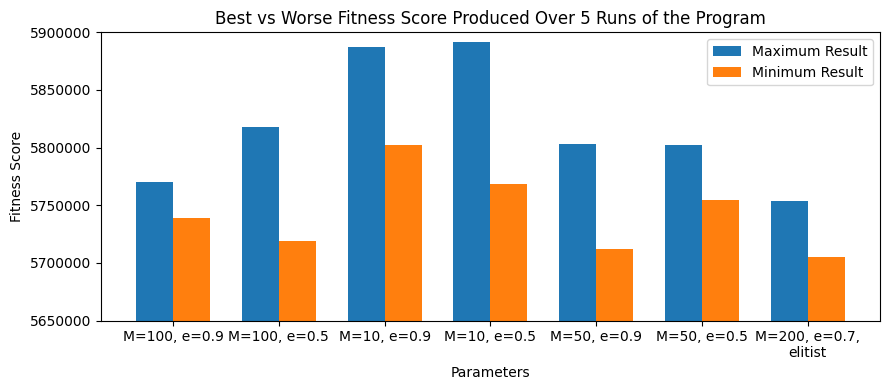

In [65]:
labels = ["M=100, e=0.9", "M=100, e=0.5", "M=10, e=0.9", "M=10, e=0.5", "M=50, e=0.9", "M=50, e=0.5", "M=200, e=0.7,\nelitist"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
mins = [5769888, 5818092, 5887412, 5891900, 5802806, 5802140, 5753972]
maxs = [5738812, 5719140, 5801938, 5768352, 5712010, 5754378, 5705038]
fig, ax = plt.subplots(figsize =(9,4))
rects1 = ax.bar(x - width/2, mins, width, label='Maximum Result')
rects2 = ax.bar(x + width/2, maxs, width, label='Minimum Result')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fitness Score')
ax.set_xlabel('Parameters')
plt.ylim(5650000, 5900000)
ax.set_title('Best vs Worse Fitness Score Produced Over 5 Runs of the Program')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()


plt.show()

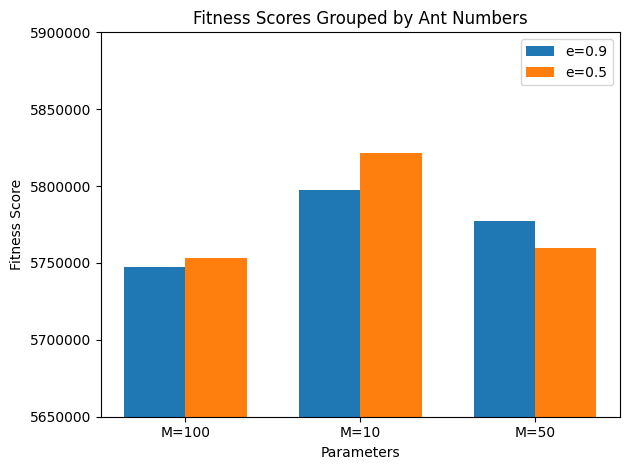

In [66]:
labels = ['M=100', 'M=10', 'M=50']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
point5 = [second, forth, sixth]
point9 = [first, third, fith]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, point9, width, label='e=0.9')
rects2 = ax.bar(x + width/2, point5, width, label='e=0.5')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fitness Score')
ax.set_xlabel('Parameters')
plt.ylim(5650000, 5900000)
ax.set_title('Fitness Scores Grouped by Ant Numbers')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()

plt.show()

# Pheromone Histograms

Text(0.5, 1.0, 'Histogram to show how many paths have different pheromone levels (DEMO)')

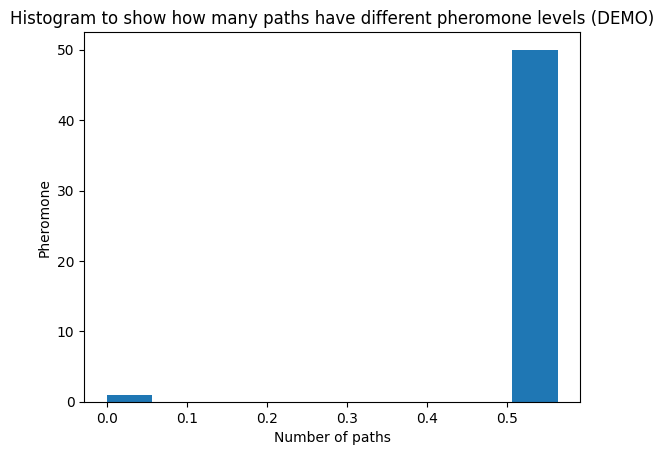

In [67]:
plt.hist(pheromone_matrix(51)[4])
plt.xlabel("Number of paths")
plt.ylabel("Pheromone")
plt.title("Histogram to show how many paths have different pheromone levels (DEMO)")

Text(0.5, 1.0, 'Histogram to show how many paths have different pheromone levels (M=100, e=0.9)')

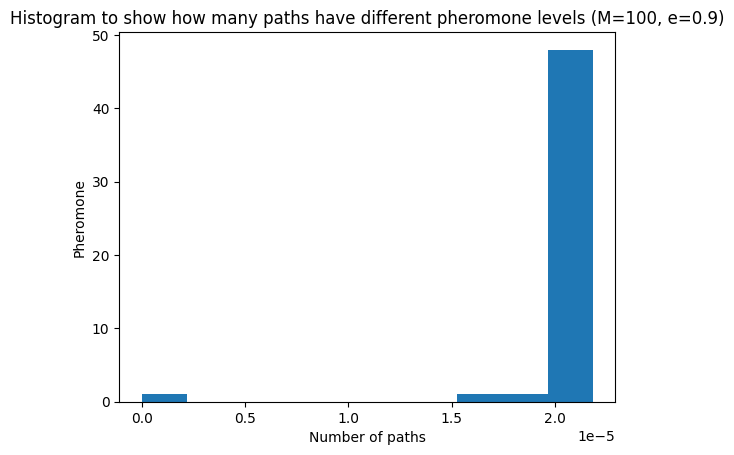

In [68]:
plt.hist(p1[4])
plt.xlabel("Number of paths")
plt.ylabel("Pheromone")
plt.title("Histogram to show how many paths have different pheromone levels (M=100, e=0.9)")

Text(0.5, 1.0, 'Histogram to show how many paths have different pheromone levels (M=100, e=0.5)')

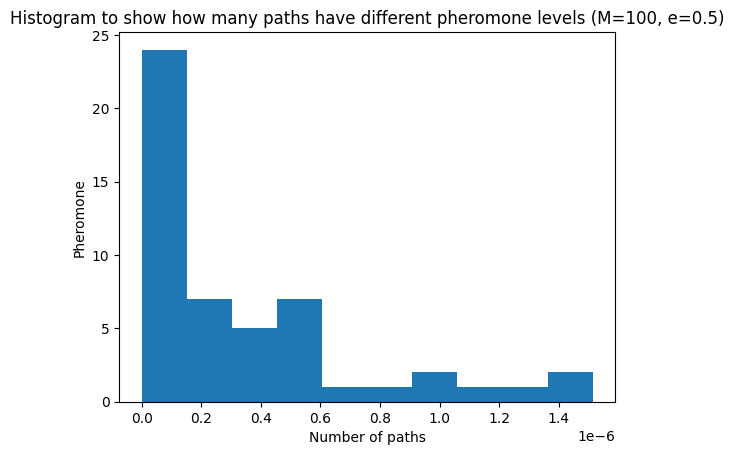

In [69]:
plt.hist(p2[4])
plt.xlabel("Number of paths")
plt.ylabel("Pheromone")
plt.title("Histogram to show how many paths have different pheromone levels (M=100, e=0.5)")

Text(0.5, 1.0, 'Histogram to show how many paths have different pheromone levels (M=10, e=0.9)')

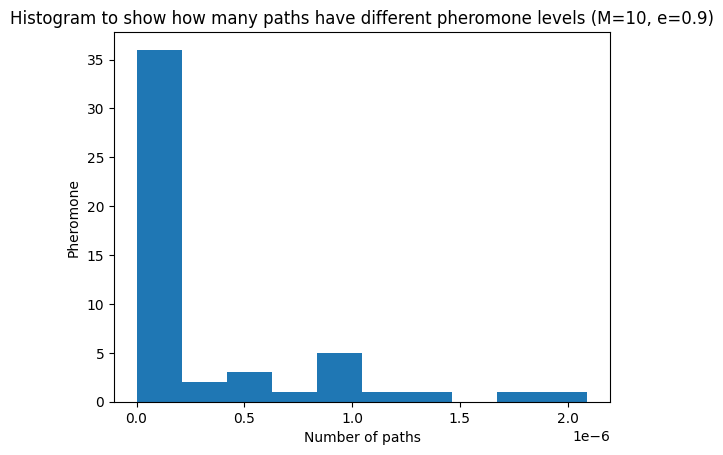

In [70]:
plt.hist(p3[4])
plt.xlabel("Number of paths")
plt.ylabel("Pheromone")
plt.title("Histogram to show how many paths have different pheromone levels (M=10, e=0.9)")

Text(0.5, 1.0, 'Histogram to show how many paths have different pheromone levels (M=10, e=0.5)')

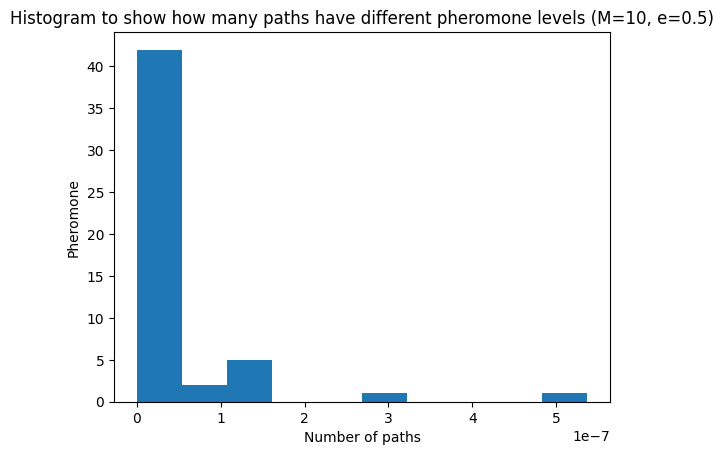

In [71]:
plt.hist(p4[4])
plt.xlabel("Number of paths")
plt.ylabel("Pheromone")
plt.title("Histogram to show how many paths have different pheromone levels (M=10, e=0.5)")

# Final Comparison

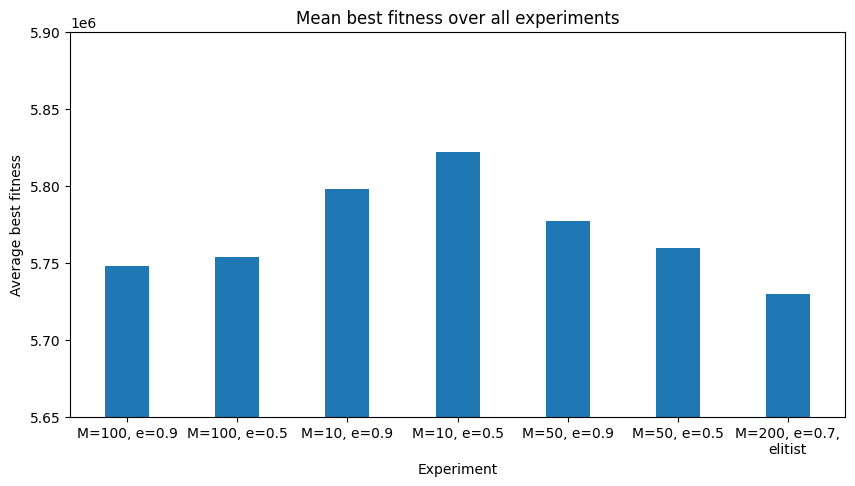

In [72]:
# creating the dataset
results = [first, second, third, forth, fith, sixth, seventh]
titles = ["M=100, e=0.9", "M=100, e=0.5", "M=10, e=0.9", "M=10, e=0.5", "M=50, e=0.9", "M=50, e=0.5", "M=200, e=0.7,\nelitist"]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(titles, results,
        width = 0.4)

plt.ylim(5650000, 5900000)
 
plt.xlabel("Experiment")
plt.ylabel("Average best fitness")
plt.title("Mean best fitness over all experiments")
plt.show()